In [188]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn.decomposition import RandomizedPCA
import numpy as np
import scipy.stats as stats

df = pd.read_pickle('../data/relationship_features_forclustering_daily.pandas_df')

df = df[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]

df = df[df["message_count"]!=0]

df_high= pd.read_pickle('../data/relationship_features_high')

df_low = pd.read_pickle('../data/relationship_features_low')

df_high = df_high[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]
df_low = df_low[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]

df.fillna(0,inplace = True)
df_high.fillna(0,inplace = True)
df_low.fillna(0,inplace = True)

In [189]:
df_high['label']=1
df_low['label']=0

label_data = pd.concat([df_high,df_low])

import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

train, test = train_test_split(label_data, test_size = 0.2)

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

predictors =["compound","message_count_reciprocity","word_count","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]

X_train = train[predictors]
y_train = train["label"]

X_test = test[predictors]
y_test = test["label"]

model = LogisticRegression()
model = model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

In [191]:
pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_)))

,0,1
0,compound,[-0.107848171851]
1,message_count_reciprocity,[-0.576013285878]
2,word_count,[11.7001781741]
3,word_count_reciprocity,[1.027923075]
4,response_time,[-1.32958488135]
5,response_time_reciprocity,[1.57999665311]
6,sentiment_reciprocity,[-0.109122409301]


In [192]:
# generate class probabilities
predicted = model.predict(X_test)
print predicted

probs = model.predict_proba(X_test)
print probs

[0 1 1 ..., 1 0 1]
[[ 0.63863581  0.36136419]
 [ 0.36403626  0.63596374]
 [ 0.26879609  0.73120391]
 ..., 
 [ 0.07891819  0.92108181]
 [ 0.66355741  0.33644259]
 [ 0.2107843   0.7892157 ]]


In [193]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.770229007634
0.848794176207


In [194]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[343 147]
 [154 666]]
             precision    recall  f1-score   support

          0       0.69      0.70      0.70       490
          1       0.82      0.81      0.82       820

avg / total       0.77      0.77      0.77      1310



In [195]:
# evaluate the model using 10-fold cross-validation

X = label_data[predictors]
y = label_data["label"]
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.75457317  0.7648855   0.78625954  0.81526718  0.74198473  0.75267176
  0.76183206  0.8         0.73587786  0.71100917]
0.7624360971


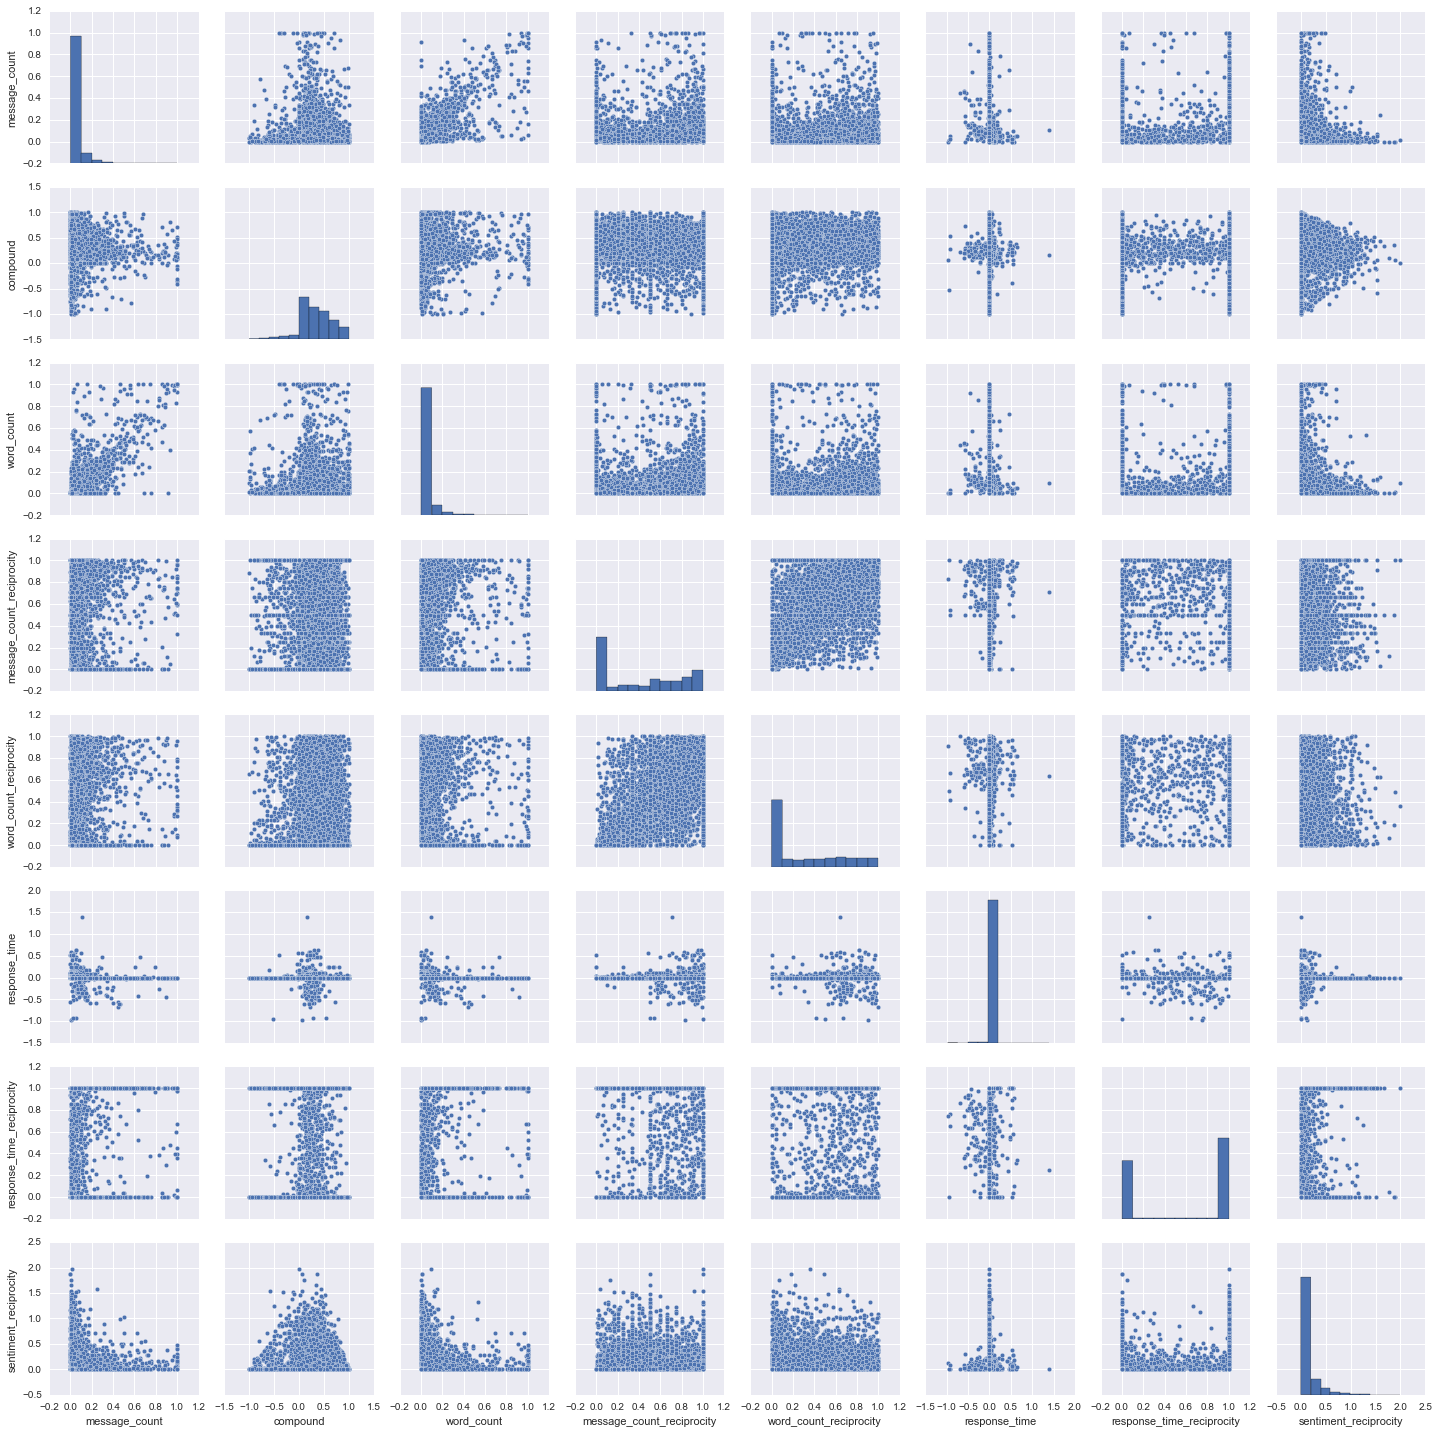

In [196]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline  


s = sns.pairplot(df)

In [198]:
#predict for a particular case 

df = pd.read_csv("../data/user_df/data_frame_12305_33103")

df.fillna(0,inplace=True)

df = df[["compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]


output = model.predict_proba(df)
positive =output[:,1]

print positive.mean()

df["output"] = positive


df

0.817598435137


,compound,word_count,message_count_reciprocity,word_count_reciprocity,response_time,response_time_reciprocity,sentiment_reciprocity,output
0,0.473757,0.296701,0.750000,0.347561,0,1,0.063547,0.999945
1,0.765575,0.222286,1.000000,0.187500,0,1,0.091929,0.999997
2,0.563450,0.064442,0.263158,0.920000,0,1,0.203760,0.991881
3,0.000000,0.003644,1.000000,0.000000,0,0,0.000000,0.999984
4,0.273200,0.004603,0.166667,0.000000,0,1,0.000000,0.943679
5,0.654075,0.034714,0.600000,0.740385,0,1,0.121350,0.999812
6,0.113914,0.157077,0.214286,0.644578,0,1,1.181383,0.978936
7,0.585900,0.012850,0.200000,0.000000,0,1,0.000000,0.959699
8,-0.318200,0.005754,0.500000,0.153846,0,0,0.000000,0.995321
9,0.000000,0.000959,0.666667,0.250000,0,1,0.000000,0.999871
